In [1]:
# Setting up the Colab environment. DO NOT EDIT!
import os
import warnings
warnings.filterwarnings("ignore")

try:
    import otter

except ImportError:
    ! pip install -q otter-grader==4.0.0
    import otter

if not os.path.exists('lab-tests'):
    zip_files = [f for f in os.listdir() if f.endswith('.zip')]
    assert len(zip_files)>0, 'Could not find any zip files!'
    assert len(zip_files)==1, 'Found multiple zip files!'
    ! unzip {zip_files[0]}

grader = otter.Notebook(colab=True,
                        tests_dir = 'lab-tests')

# Lab

## Introduction

This week we will look at data from a cohort of People Living with HIV (PLH) here at Drexel.

As we discussed in the introduction, this data collection effort was done to provide a resource for many projects across the fields of HIV, aging, inflammation, neurocognitive impairment, immune function, and unknowable future projects.
In this lab we will explore a collection of cytokines and chemokines measured by a Luminex panel of common biomarkers of inflammation.

## Learning Objectives
At the end of this learning activity you will be able to:
 - Pratice creating barplots and scatterplots.
 - Employ `DataFrame.corr` to measure the correlation between variables.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
data = pd.read_csv('cytokine_data.csv')
data.head()

,Sex,Age,isAA,egf,eotaxin,fgfbasic,gcsf,gmcsf,hgf,ifnalpha,...,mig,mip1alpha,mip1beta,tnfalpha,vegf,cocaine_use,cannabinoid_use,neuro_screen_impairment_level,bmi,years_infected
0,Male,53.0,Checked,65.01,170.20,50.32,117.14,2.51,481.37,110.79,...,185.29,104.63,151.15,17.61,7.54,True,True,none,21,18
1,Female,62.0,Checked,232.83,118.23,36.03,215.38,24.53,988.71,66.13,...,397.24,242.10,230.87,51.22,31.60,True,True,none,22,16
2,Male,60.0,Checked,84.84,55.27,13.22,14.08,0.48,364.31,78.67,...,18.63,34.85,68.34,2.48,0.84,False,False,none,25,16
3,Male,62.0,Checked,24.13,70.18,4.12,14.08,1.33,510.36,118.64,...,118.63,113.30,49.15,10.93,3.53,True,True,impaired,29,21
4,Male,54.0,Checked,186.98,69.18,32.56,184.74,12.55,395.87,40.79,...,140.56,131.83,241.00,32.01,10.81,True,True,none,26,16


### Q1: Explore the neurological function of the participants in the dataset.

Create a barplot of the counts for each of the `neuro_screen_impairment_level` level categories.

 - Adjust the y-axis to have a limit of 0 to 150 and the label to `'Participants'`
 - Adjust the x-label to `'Impairment Level'`

|               |    |
| --------------|----|
| Points        | 2  |
| Public Checks | 5  |
| Hidden Testss | 0  |

_Points:_ 2

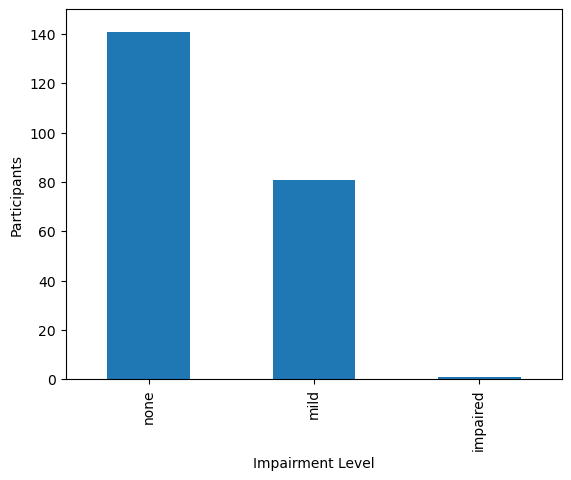

In [4]:
# BEGIN SOLUTION NO PROMPT

# Generate the figure
q1_ax = data["neuro_screen_impairment_level"].value_counts().plot(kind='bar')

# Adjust labels and limits
q1_ax.set_ylim(0, 150)
q1_ax.set_ylabel('Participants')
q1_ax.set_xlabel('Impairment Level')

# END SOLUTION
""" # BEGIN PROMPT

# Generate the figure
q1_ax = ...


# Adjust labels and limits

"""; # END PROMPT

In [10]:
# DO NOT REMOVE!
plt.close()
# For the grader

In [ ]:
grader.check("q1_impairement_plot")

### Q2: Consider how pro-inflamatory markers are related to neurological impairment.

Examine the expression of the following cytokines.
 - `tnfalpha`
 - `il6`
 - `mcp1`
 - `mip1alpha`



|               |    |
| --------------|----|
| Points        | 10 |
| Public Checks | 9  |
| Hidden Testss | 1  |

_Points:_ 10

In [11]:
# Use data.groupby(...) to take mean of each cytokines for each neuro_screen_impairment_level
# The table should have each of the 4 cytokines as columns 
#  and each row should be each of the different impairment levels.

# BEGIN SOLUTION NO PROMPT

cyto_cols = ['tnfalpha', 'il6', 'mcp1', 'mip1alpha']
q2_cytokine_summary = data.groupby("neuro_screen_impairment_level")[cyto_cols].mean()

# END SOLUTION
""" # BEGIN PROMPT

q2_cytokine_summary = ...

"""; # END PROMPT

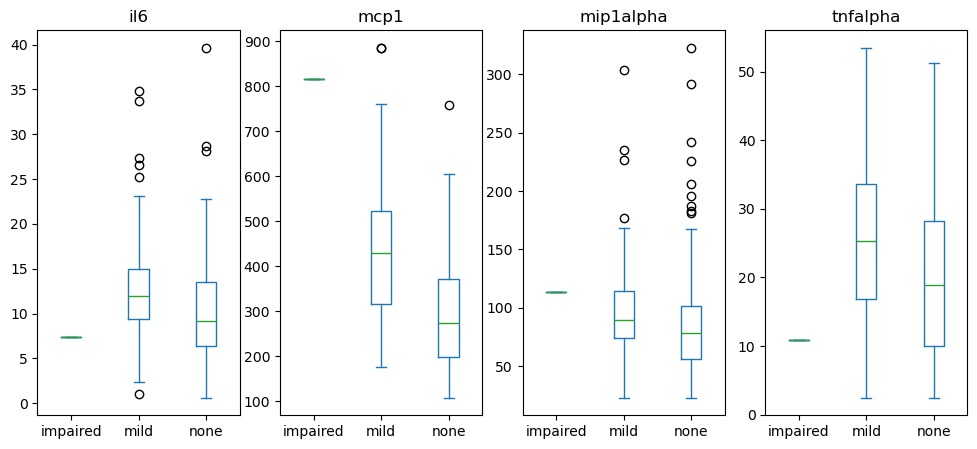

In [12]:
# Use `.plot(kind = 'box', ...)` to create a set of boxplots for each cytokine split across each `neuro_screen_impairment_level` value.
# Each axis should be a cytokine
# Each category in each axis should be a neuro_screen_impairment_level

# BEGIN SOLUTION NO PROMPT
ncols = ["neuro_screen_impairment_level"] + cyto_cols
q2_axs = data[ncols].plot(kind = 'box', by = "neuro_screen_impairment_level", figsize=(12, 5))
# END SOLUTION
""" # BEGIN PROMPT

q2_axs = ...

"""; # END PROMPT

In [13]:
# Which cytokine has the largest absolute difference in mean expression between `mild` and `none`?
# Answer as a string

q2_ans = 'mcp1' # SOLUTION

In [23]:
# DO NOT REMOVE!
plt.close()
# For the grader

In [ ]:
grader.check("q2_pro_inflam")

### Q3: Hypothesis generation

One advantage of a cohort-style study is that the data can be used to generate new hypotheses to test.
Here, we have collected the cytokine expression of many people along with their BMI.
Use the `.corr()` method to find the correlation between BMI and all cytokines.
Then, generate a hypothesis about which top-5 cytokines are worth a followup.

|               |    |
| --------------|----|
| Points        | 10 |
| Public Checks | 10 |
| Hidden Testss | 3  |

_Points:_ 10

In [24]:
# Use this list of all cytokines in the dataset to answer the following questions
all_cytokines = list(data.columns[3:-5])
print(', '.join(all_cytokines))

egf, eotaxin, fgfbasic, gcsf, gmcsf, hgf, ifnalpha, ifngamma, il10, il12, il13, il15, il17, il1beta, il2, il2r, il4, il5, il6, il7, il8, ilra, ip10, mcp1, mig, mip1alpha, mip1beta, tnfalpha, vegf


In [25]:
# Calculate the cross correlation matrix that only includes bmi and all_cytokines

# BEGIN SOLUTION NO PROMPT
q3_cross_cor = data[all_cytokines+['bmi']].corr() # SOLUTION
# END SOLUTION
""" # BEGIN PROMPT

q3_cross_cor = ...

"""; # END PROMPT

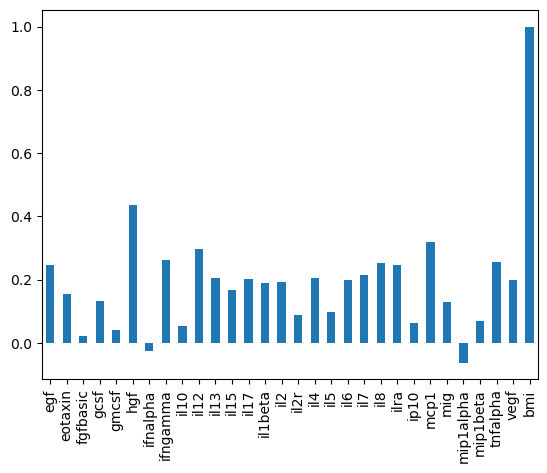

In [26]:
# Plot the correlation between BMI and all other columns as a bar plot

q3_bar_ax = q3_cross_cor['bmi'].plot(kind = 'bar') # SOLUTION

In [27]:
# Extract a Series of the top 5 cytokines
# Be sure to remove BMI

q3_top5 = q3_cross_cor['bmi'].drop(['bmi']).sort_values().tail() # SOLUTION

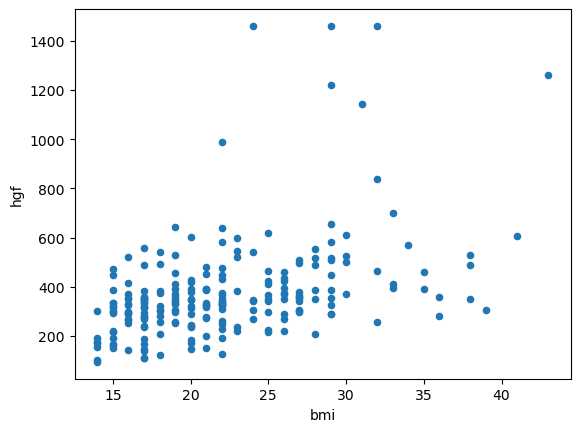

In [28]:
# Create a scatterplot between the bmi (on the x-axis) and the most correlated cytokine (on the y-axis)

q3_scatter_ax = data.plot(kind = 'scatter', x = 'bmi', y = 'hgf') # SOLUTION

# Leave the axes labels as defaults for the grader

In [ ]:
grader.check("q3_bmi_hypothesis_gen")

In [42]:
# DO NOT REMOVE!
plt.close()
# For the grader

With this information in hand, one could design more directed experiments to further understand whether these correlations are biologically meaningful.
This hypothesis generating technique is useful in a number of ways.

<!-- BEGIN QUESTION -->

### Q4: Exploration

Use this technique to find correlations between between cytokines and any other demographic variable.

Include at least one barplot of correlation coefficients.
If your variable is categorical, use show a boxplot of the most correlated cytokine.
If your variable is continious, instead show a scatterplot.

With each figure, include a text-box with a figure caption.

There is no grader for this question.

_Points:_ 10

<!-- END QUESTION -->



In [43]:
# DO NOT REMOVE!
plt.close()
# For the grader

--------------------------------------------

## Submission

Check:
 - That all tables and graphs are rendered properly.
 - Code completes without errors by using `Restart & Run All`.
 - All checks **pass**.
 
 Then save the notebook and the `File` -> `Download` -> `Download .ipynb`. Upload this file to BBLearn.
